# Exploring the YouTube Dominance of Leading Music Artists: An EDA Projects using YouTube API in Python

# DATA ANALYSIS

## Importing Libraries

In [126]:
pip install isodate


In [127]:
#importing libraries
import pandas as pd
import numpy as np
from dateutil import parser
from datetime import datetime
import isodate


# Data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
import plotly.express as px


# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [128]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

## Read the data

In [129]:
# Load the data
video_df = pd.read_csv("/content/drive/MyDrive/YOUTUBE API/YOUTUBE DATA/video_data.csv")
comments_df= pd.read_csv("/content/drive/MyDrive/YOUTUBE API/YOUTUBE DATA/comments_data.csv")


In [130]:
video_df.head(5)

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,0,Lkw2b1tn6oY,Dua Lipa,the art of ghosting…,NaN,NaN,2023-11-12T19:46:36Z,54272.0,8281.0,NaN,178.0,PT15S,hd,False
1,1,KJ8lbgzi2Uw,Dua Lipa,tell me all the ways you need me 🖤 brought to ...,NaN,NaN,2023-11-10T23:21:28Z,93361.0,10474.0,NaN,254.0,PT16S,hd,False
2,2,5IuxuOgJlpk,Dua Lipa,catch these before they go…,NaN,NaN,2023-11-10T19:32:25Z,146668.0,18869.0,NaN,437.0,PT16S,hd,False
3,3,DM6r5i_NysU,Dua Lipa,⛓️HOUDINI! OUT! NOW! EVERYWHERE!,NaN,NaN,2023-11-09T23:38:56Z,94974.0,12795.0,NaN,208.0,PT37S,hd,False
4,4,ds0WzSKYP8g,Dua Lipa,I'm not here for long 🔒 brought to you by YouT...,NaN,NaN,2023-11-09T23:26:56Z,2420859.0,128777.0,NaN,777.0,PT13S,hd,False


In [131]:
comments_df.head(5)

,Unnamed: 0,video_id,comments
0,0,Lkw2b1tn6oY,"['😅', 'Shes the best', 'Hi dua lipa', 'I feel ..."
1,1,KJ8lbgzi2Uw,['The man: are you earn from singing or steali...
2,2,5IuxuOgJlpk,"['Vinyl please 🙏🏼🙏🏼😭', 'Fu** m* 10$', ""So that..."
3,3,DM6r5i_NysU,['Meu bem vc tá gatinha demais arrebenta Coraç...
4,4,ds0WzSKYP8g,"['....parece a Luluca em versão 2.0 kkkk', 'D..."


# DATA PREPROCESSING

In [132]:
# Check for null values
video_df.isnull().any()

Unnamed: 0        False
video_id          False
channelTitle      False
title             False
description        True
tags               True
publishedAt       False
viewCount          True
likeCount          True
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
dtype: bool

In [133]:
# Assuming video_df is the name of your DataFrame
video_df = video_df.dropna(subset=['viewCount','likeCount','commentCount'])


In [134]:
# Check if all the channel names are unique
video_df.channelTitle.unique()

array(['Dua Lipa', 'dualipaVEVO', 'Selena Gomez', 'SelenaGomezVEVO',
       'Ed Sheeran', 'EdSheeranVEVO', 'Harry Styles', 'HarryStylesVEVO',
       'Katy Perry', 'KatyPerryVEVO', 'Billie Eilish', 'BillieEilishVEVO',
       'ArianaGrandeVevo', 'Ariana Grande', 'Bruno Mars', 'BrunoMarsVEVO',
       'Taylor Swift', 'TaylorSwiftVEVO', 'Justin Bieber',
       'JustinBieberVEVO'], dtype=object)

In [135]:
# Renaming the channel name
video_df['channelTitle'] = video_df['channelTitle'].str.replace('dualipaVEVO', 'Dua Lipa')
video_df['channelTitle'] = video_df['channelTitle'].str.replace('SelenaGomezVEVO', 'Selena Gomez')
video_df['channelTitle'] = video_df['channelTitle'].str.replace('EdSheeranVEVO', 'Ed Sheeran')
video_df['channelTitle'] = video_df['channelTitle'].str.replace('HarryStylesVEVO', 'Harry Styles')
video_df['channelTitle'] = video_df['channelTitle'].str.replace('KatyPerryVEVO', 'Katy Perry')
video_df['channelTitle'] = video_df['channelTitle'].str.replace('BillieEilishVEVO', 'Billie Eilish')
video_df['channelTitle'] = video_df['channelTitle'].str.replace('ArianaGrandeVevo', 'Ariana Grande')
video_df['channelTitle'] = video_df['channelTitle'].str.replace('BrunoMarsVEVO', 'Bruno Mars')
video_df['channelTitle'] = video_df['channelTitle'].str.replace('TaylorSwiftVEVO', 'Taylor Swift')
video_df['channelTitle'] = video_df['channelTitle'].str.replace('JustinBieberVEVO', 'Justin Bieber')

# Check the unique channel names after removing 'VEVO'
unique_channels = video_df['channelTitle'].unique()
print(unique_channels)


['Dua Lipa' 'Selena Gomez' 'Ed Sheeran' 'Harry Styles' 'Katy Perry'
 'Billie Eilish' 'Ariana Grande' 'Bruno Mars' 'Taylor Swift'
 'Justin Bieber']


<ipython-input-135-c5631f99e05a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_df['channelTitle'] = video_df['channelTitle'].str.replace('dualipaVEVO', 'Dua Lipa')
<ipython-input-135-c5631f99e05a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_df['channelTitle'] = video_df['channelTitle'].str.replace('SelenaGomezVEVO', 'Selena Gomez')
<ipython-input-135-c5631f99e05a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [136]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3006 entries, 0 to 3040
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3006 non-null   int64  
 1   video_id        3006 non-null   object 
 2   channelTitle    3006 non-null   object 
 3   title           3006 non-null   object 
 4   description     2896 non-null   object 
 5   tags            2737 non-null   object 
 6   publishedAt     3006 non-null   object 
 7   viewCount       3006 non-null   float64
 8   likeCount       3006 non-null   float64
 9   favouriteCount  0 non-null      float64
 10  commentCount    3006 non-null   float64
 11  duration        3006 non-null   object 
 12  definition      3006 non-null   object 
 13  caption         3006 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 331.7+ KB


In [137]:
# Changing the data types
cols = ['viewCount', 'likeCount', 'commentCount']
video_df[cols] = video_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [138]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3006 entries, 0 to 3040
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3006 non-null   int64  
 1   video_id        3006 non-null   object 
 2   channelTitle    3006 non-null   object 
 3   title           3006 non-null   object 
 4   description     2896 non-null   object 
 5   tags            2737 non-null   object 
 6   publishedAt     3006 non-null   object 
 7   viewCount       3006 non-null   float64
 8   likeCount       3006 non-null   float64
 9   favouriteCount  0 non-null      float64
 10  commentCount    3006 non-null   float64
 11  duration        3006 non-null   object 
 12  definition      3006 non-null   object 
 13  caption         3006 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 331.7+ KB


#FEATURE ENGINEERING

## Creating New columns from the existing data

### Engagement Rate

In [139]:
# Converting columns to numeric type
video_df['likeCount'] = pd.to_numeric(video_df['likeCount'], errors='coerce')
video_df['commentCount'] = pd.to_numeric(video_df['commentCount'], errors='coerce')
video_df['viewCount'] = pd.to_numeric(video_df['viewCount'], errors='coerce')

# Calculating  engagement rate
video_df['engagement_rate'] = (video_df['likeCount'] + video_df['commentCount']) / video_df['viewCount']

### Video Age (in days)

In [140]:
# Converting 'publishedAt' to tz-naive datetime
video_df['publishedAt'] = pd.to_datetime(video_df['publishedAt']).dt.tz_localize(None)

# Converting current datetime to tz-naive
current_datetime = datetime.now().replace(tzinfo=None)

# Calculating video age
video_df['video_age'] = (current_datetime - video_df['publishedAt']).dt.days


### Popularity Score:

In [141]:
# Calculating popularity score
video_df['popularity_score'] = (0.6 * video_df['viewCount'] + 0.3 * video_df['likeCount'] + 0.1 * video_df['commentCount'])

### Vedio Published Day

In [142]:
# Assuming 'publishedAt' is in datetime format, if not, convert it to datetime first
video_df['publishedAt'] = pd.to_datetime(video_df['publishedAt'])

# Creating a new column 'day_published' to store the day of the week
video_df['day_published'] = video_df['publishedAt'].dt.day_name()

### Published year

In [143]:
# Assuming 'publishedAt' is in datetime format, if not, convert it to datetime first
video_df['publishedAt'] = pd.to_datetime(video_df['publishedAt'])

# Creating a new column 'year_published' to store the year
video_df['year_published'] = video_df['publishedAt'].dt.year

###Published month

In [144]:
# Assuming 'publishedAt' is in datetime format, if not, convert it to datetime first
video_df['publishedAt'] = pd.to_datetime(video_df['publishedAt'])

# Creating a new column 'month_published' to store the month
video_df['month_published'] = video_df['publishedAt'].dt.month_name()

### Tag Count

In [145]:
video_df.head(5)

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,engagement_rate,video_age,popularity_score,day_published,year_published,month_published
0,0,Lkw2b1tn6oY,Dua Lipa,the art of ghosting…,NaN,NaN,2023-11-12 19:46:36,54272.0,8281.0,NaN,178.0,PT15S,hd,False,0.155863,25,35065.3,Sunday,2023,November
1,1,KJ8lbgzi2Uw,Dua Lipa,tell me all the ways you need me 🖤 brought to ...,NaN,NaN,2023-11-10 23:21:28,93361.0,10474.0,NaN,254.0,PT16S,hd,False,0.114909,26,59184.2,Friday,2023,November
2,2,5IuxuOgJlpk,Dua Lipa,catch these before they go…,NaN,NaN,2023-11-10 19:32:25,146668.0,18869.0,NaN,437.0,PT16S,hd,False,0.131631,27,93705.2,Friday,2023,November
3,3,DM6r5i_NysU,Dua Lipa,⛓️HOUDINI! OUT! NOW! EVERYWHERE!,NaN,NaN,2023-11-09 23:38:56,94974.0,12795.0,NaN,208.0,PT37S,hd,False,0.136911,27,60843.7,Thursday,2023,November
4,4,ds0WzSKYP8g,Dua Lipa,I'm not here for long 🔒 brought to you by YouT...,NaN,NaN,2023-11-09 23:26:56,2420859.0,128777.0,NaN,777.0,PT13S,hd,False,0.053516,27,1491226.2,Thursday,2023,November


In [146]:
#Calculating tag count
video_df['tag_count'] = video_df['tags'].apply(lambda x: 0 if pd.isna(x) else len(x.split(',')))


In [147]:
video_df.tag_count.head(5)

0    0
1    0
2    0
3    0
4    0
Name: tag_count, dtype: int64

### Title Length:

In [148]:
# Calculating title length
video_df['title_length'] = video_df['title'].apply(len)


### Duration in seconds

In [149]:
# Calculating the duration of the vedio in seconds
video_df['durationSeconds'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

In [150]:
video_df.head(2)

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,engagement_rate,video_age,popularity_score,day_published,year_published,month_published,tag_count,title_length,durationSeconds
0,0,Lkw2b1tn6oY,Dua Lipa,the art of ghosting…,NaN,NaN,2023-11-12 19:46:36,54272.0,8281.0,NaN,178.0,PT15S,hd,False,0.155863,25,35065.3,Sunday,2023,November,0,20,15.0
1,1,KJ8lbgzi2Uw,Dua Lipa,tell me all the ways you need me 🖤 brought to ...,NaN,NaN,2023-11-10 23:21:28,93361.0,10474.0,NaN,254.0,PT16S,hd,False,0.114909,26,59184.2,Friday,2023,November,0,83,16.0


## Removing all the Unwanted Columns


In [151]:
# Removing the unwanted columns
video_df = video_df.drop(columns=['Unnamed: 0','description','video_id','favouriteCount','tags','publishedAt', 'duration', 'caption'])


In [152]:
video_df.head(5)

,channelTitle,title,viewCount,likeCount,commentCount,definition,engagement_rate,video_age,popularity_score,day_published,year_published,month_published,tag_count,title_length,durationSeconds
0,Dua Lipa,the art of ghosting…,54272.0,8281.0,178.0,hd,0.155863,25,35065.3,Sunday,2023,November,0,20,15.0
1,Dua Lipa,tell me all the ways you need me 🖤 brought to ...,93361.0,10474.0,254.0,hd,0.114909,26,59184.2,Friday,2023,November,0,83,16.0
2,Dua Lipa,catch these before they go…,146668.0,18869.0,437.0,hd,0.131631,27,93705.2,Friday,2023,November,0,27,16.0
3,Dua Lipa,⛓️HOUDINI! OUT! NOW! EVERYWHERE!,94974.0,12795.0,208.0,hd,0.136911,27,60843.7,Thursday,2023,November,0,32,37.0
4,Dua Lipa,I'm not here for long 🔒 brought to you by YouT...,2420859.0,128777.0,777.0,hd,0.053516,27,1491226.2,Thursday,2023,November,0,72,13.0


video_df.channelTitle.unique ()

## Exploratory Data Analysis

### How does the distribution of views vary based on each channel

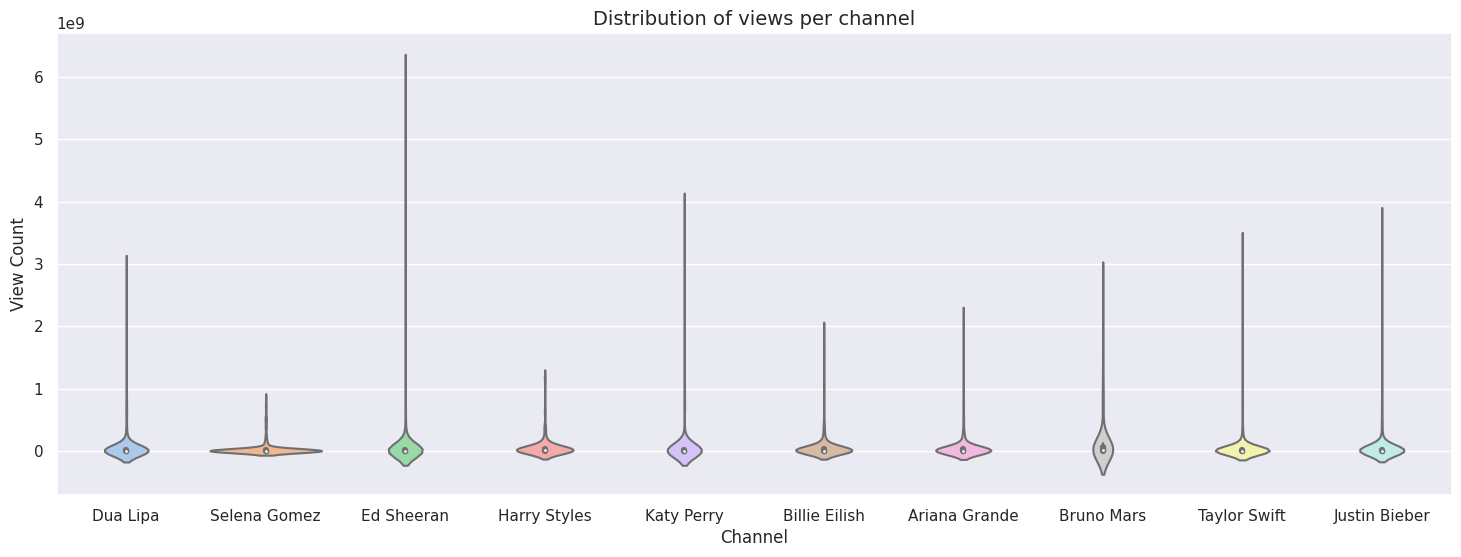

In [153]:
# Seting the figure size
plt.figure(figsize=(18, 6))

# Creating a violin plot to visualize the distribution of views per channel
sns.violinplot(x='channelTitle', y='viewCount', data=video_df, palette='pastel')

# Adding title and labels
plt.title('Distribution of views per channel', fontsize=14)
plt.xlabel('Channel')
plt.ylabel('View Count')

# Show the plot
plt.show()


### Is there any correlation with the engagement rate and viewCount?


In [154]:
# Creating a scatter plot to show the correlation between 'viewCount' and 'engagement_rate'
scatter_fig = px.scatter(video_df, x='viewCount', y='engagement_rate',
                         size='popularity_score', hover_data=['channelTitle'],
                         title='Correlation between View Count and Engagement Rate',
                         labels={'viewCount': 'View Count', 'engagement_rate': 'Engagement Rate'})

# Changing the color scale and point size
scatter_fig.update_traces(marker=dict(size=10, colorscale='Viridis'))

# Show the scatter plot
scatter_fig.show()

### How is the distribution of videos published across different days of the week?

In [155]:
# Converting 'day_published' column to categorical with a custom order
video_df['day_published'] = pd.Categorical(video_df['day_published'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# Grouping 'day_published' and count the number of videos published on each day
publishing_day_counts = video_df['day_published'].value_counts().reset_index().rename(columns={'index': 'Day', 'day_published': 'Count'})

# Defining a custom order for days
custom_day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Creating a bar chart using Plotly Express to visualize the distribution of publishing days
bar_chart = px.bar(publishing_day_counts, x='Day', y='Count', color='Day', title='Videos Published by Day of the Week', category_orders={"Day": custom_day_order})

# Customize the layout of the bar chart
bar_chart.update_layout(
    xaxis_title='Day of the Week',
    yaxis_title='Number of Videos Published',
    title_x=0.5,  # Center the title
    font=dict(size=12),
)

# Show the bar chart
bar_chart.show()


### What is the average like-to-view ratio for the channel's videos?

In [156]:
# Ensuring 'likeCount' and 'viewCount' are numeric columns
video_df['likeCount'] = pd.to_numeric(video_df['likeCount'], errors='coerce')
video_df['viewCount'] = pd.to_numeric(video_df['viewCount'], errors='coerce')

# Calculating the like-to-view ratio
video_df['like_to_view_ratio'] = video_df['likeCount'] / video_df['viewCount']

# Creating a histogram to visualize the distribution of like-to-view ratios
histogram = px.histogram(video_df, x='like_to_view_ratio', title='Distribution of Like-to-View Ratios')

# Customize the layout
histogram.update_layout(
    xaxis_title='Like-to-View Ratio',
    yaxis_title='Number of Videos',
    title_x=0.5,
    font=dict(size=12),
)

# Show the histogram
histogram.show()

### Is there a trend in publishing frequency over different months?

In [157]:
#Converting 'day_published' column to categorical with a custom order
video_df['month_published'] = pd.Categorical(video_df['month_published'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Grouping month_published and count the number of videos published each month
publishing_month_counts = video_df['month_published'].value_counts().reset_index().rename(columns={'index': 'Month', 'month_published': 'Count'})

# Creating a bar chart to visualize the distribution of publishing months
bar_chart = px.bar(publishing_month_counts, x='Month', y='Count', color='Month', title='Videos Published by Month', category_orders={"Month": ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']})

# Customize the layout
bar_chart.update_layout(
    xaxis_title='Month',
    yaxis_title='Number of Videos Published',
    title_x=0.5,
    font=dict(size=12),
)

# Show the bar chart
bar_chart.show()

### Is there a specific range of video durations that perform best in terms of engagement?

In [163]:
# Assuming 'durationSeconds' is the column representing video duration
video_df['durationSeconds'] = pd.to_numeric(video_df['durationSeconds'], errors='coerce')


In [164]:
# Defining bin edges and labels
bin_edges = [0, 300, 600, 900, 1200, np.inf]
bin_labels = ['<5 min', '5-10 min', '10-15 min', '15-20 min', '20+ min']

# Creating a new column with duration bins
video_df['duration_bin'] = pd.cut(video_df['durationSeconds'], bins=bin_edges, labels=bin_labels)


In [165]:
#Group the DataFrame by the 'duration_bin' column and calculate the mean of 'likeCount' and 'commentCount'
engagement_by_duration = video_df.groupby('duration_bin').agg({
    'likeCount': 'mean',
    'commentCount': 'mean',
    # Add other metrics as needed
}).reset_index()


In [166]:
# Bar chart for average likes by duration
fig_likes = px.bar(engagement_by_duration, x='duration_bin', y='likeCount', title='Average Likes by Video Duration', color_discrete_sequence=['green'])

# Bar chart for average comments by duration
fig_comments = px.bar(engagement_by_duration, x='duration_bin', y='commentCount', title='Average Comments by Video Duration', color_discrete_sequence=['purple'])

# Display the charts
fig_likes.show()
fig_comments.show()

### How does the number of tags impact the viewership?

<Axes: xlabel='tag_count', ylabel='viewCount'>

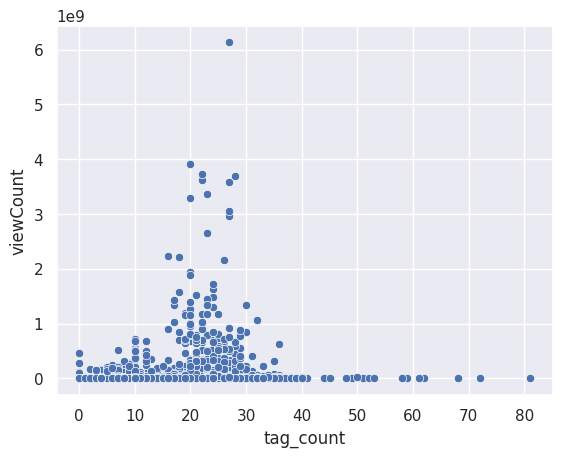

In [167]:
# Creating a scatter plot using Seaborn to visualize the relationship between 'tag_count' and 'viewCount'
sns.scatterplot(data = video_df, x = "tag_count", y = "viewCount")

### Is there a relationship between the length of a video's title and the number of views it receives

/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



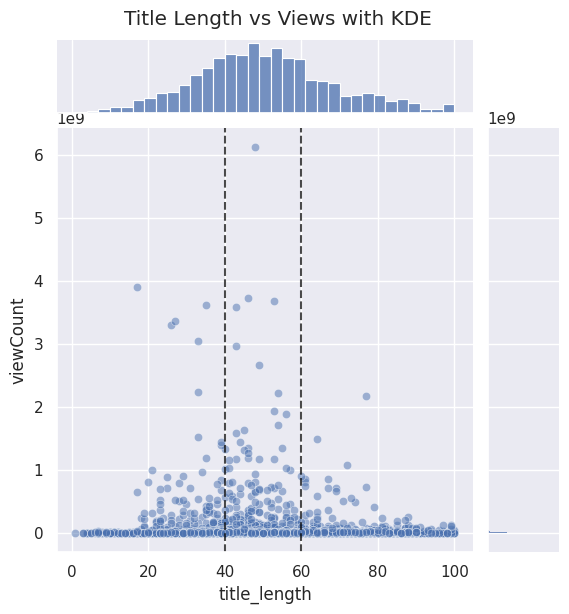

In [168]:
# defining the bins for title lengths
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

# Cut the data into bins based on title length
video_df['title_length_bin'] = pd.cut(video_df['title_length'], bins=bins)

# calculating total views in each bin
views_by_title_length = video_df.groupby('title_length_bin')['viewCount'].sum()

# finding the bin with the most views
most_views_bin = views_by_title_length.idxmax()

# boundaries of the range
left_boundary = most_views_bin.left
right_boundary = most_views_bin.right

# joint plot
joint_plot = sns.jointplot(x='title_length', y='viewCount', data=video_df, kind='scatter', alpha=0.5, cmap='Blues')

# add vertical lines for the range with the most views
joint_plot.ax_joint.axvline(left_boundary, color='black', linestyle='--', label='Most Views Range', alpha=0.7)
joint_plot.ax_joint.axvline(right_boundary, color='black', linestyle='--', alpha=0.7)

plt.suptitle('Title Length vs Views with KDE', y=1.02)
plt.show()

### Is there a connection between the number of likes, comments, and the total views a video receives?

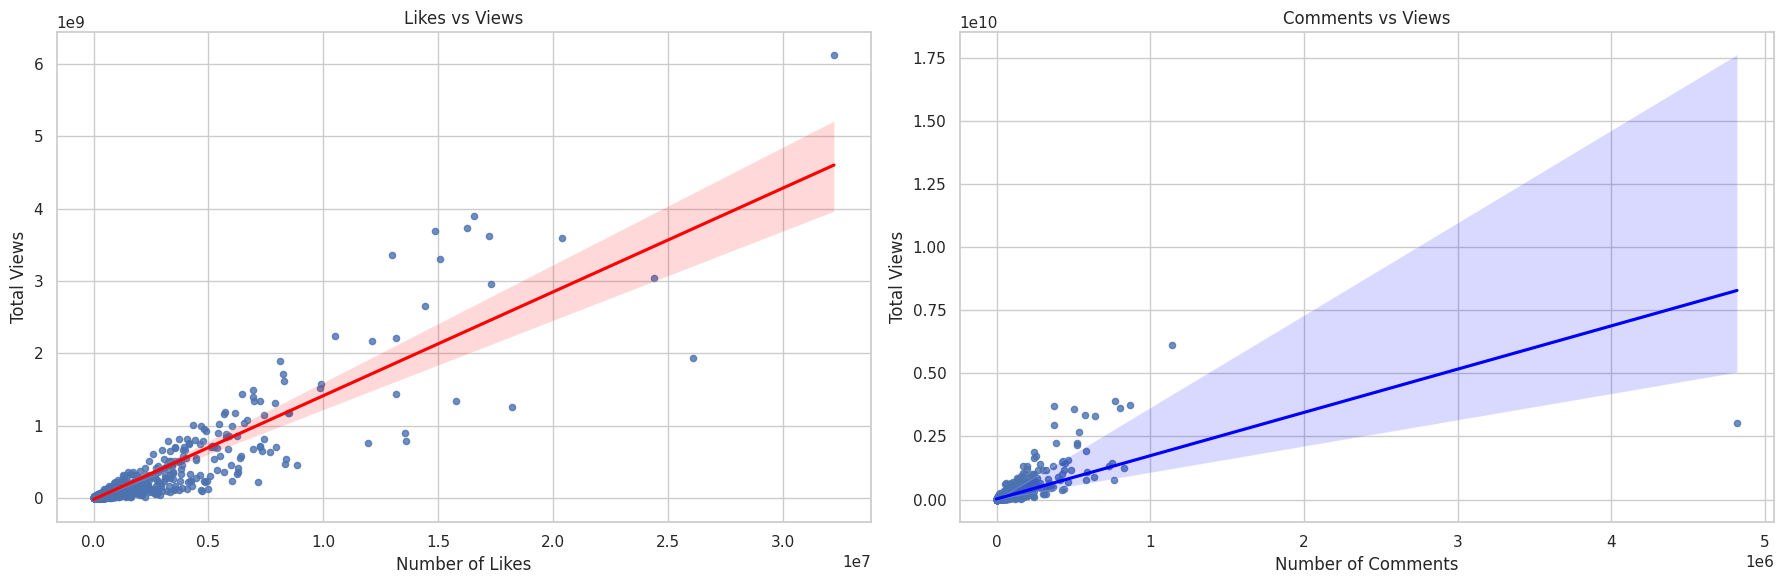

In [169]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Scatter plot for Likes vs Views
sns.regplot(x='likeCount', y='viewCount', data=video_df, scatter_kws={'s': 20}, line_kws={'color': 'red'}, ax=axes[0])
axes[0].set_title('Likes vs Views')
axes[0].set_xlabel('Number of Likes')
axes[0].set_ylabel('Total Views')

# Scatter plot for Comments vs Views
sns.regplot(x='commentCount', y='viewCount', data=video_df, scatter_kws={'s': 20}, line_kws={'color': 'blue'}, ax=axes[1])
axes[1].set_title('Comments vs Views')
axes[1].set_xlabel('Number of Comments')
axes[1].set_ylabel('Total Views')

# Adjusting layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:151: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning:

invalid value encountered in subtract



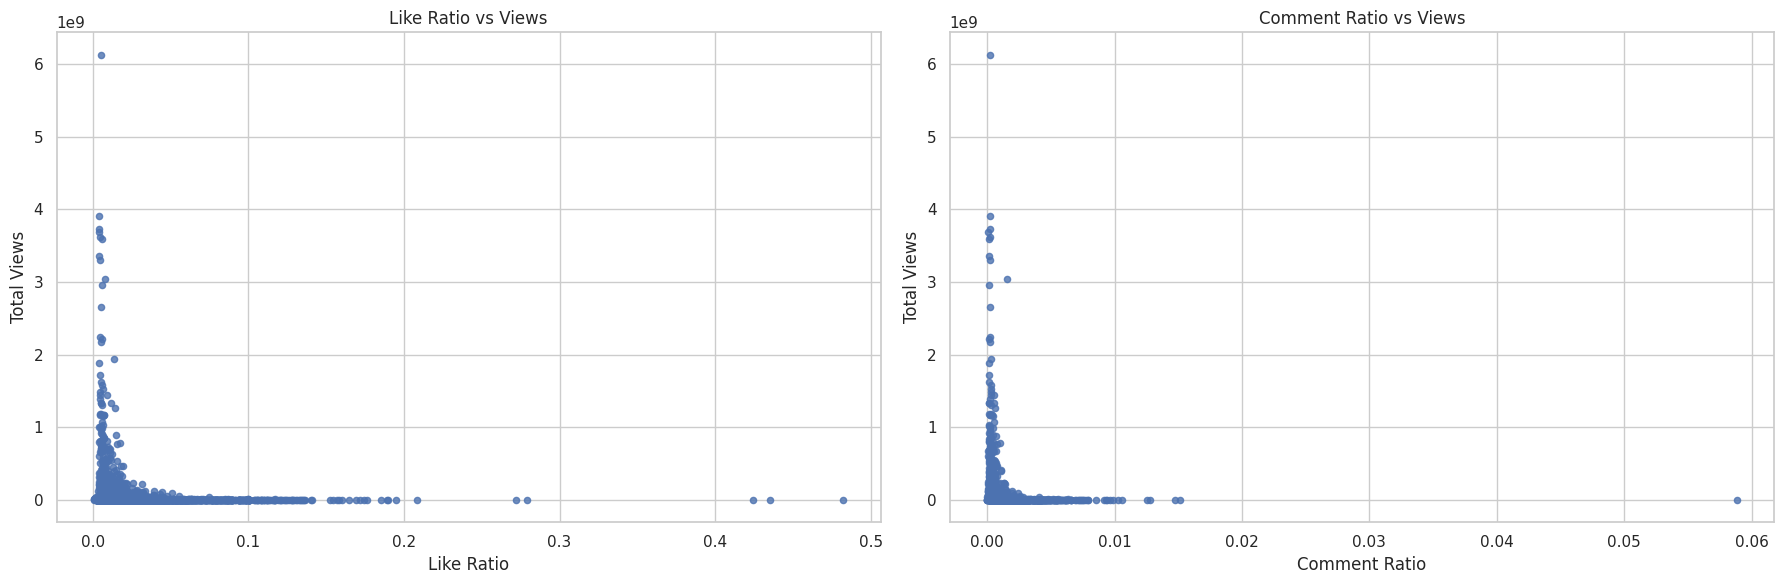

In [170]:
# Calculate like ratio and comment ratio
video_df['like_ratio'] = video_df['likeCount'] / video_df['viewCount']
video_df['comment_ratio'] = video_df['commentCount'] / video_df['viewCount']

# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Scatter plot for Like Ratio vs Views
sns.regplot(x='like_ratio', y='viewCount', data=video_df, scatter_kws={'s': 20}, line_kws={'color': 'red'}, ax=axes[0])
axes[0].set_title('Like Ratio vs Views')
axes[0].set_xlabel('Like Ratio')
axes[0].set_ylabel('Total Views')

# Scatter plot for Comment Ratio vs Views
sns.regplot(x='comment_ratio', y='viewCount', data=video_df, scatter_kws={'s': 20}, line_kws={'color': 'blue'}, ax=axes[1])
axes[1].set_title('Comment Ratio vs Views')
axes[1].set_xlabel('Comment Ratio')
axes[1].set_ylabel('Total Views')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

### Comment Analysis

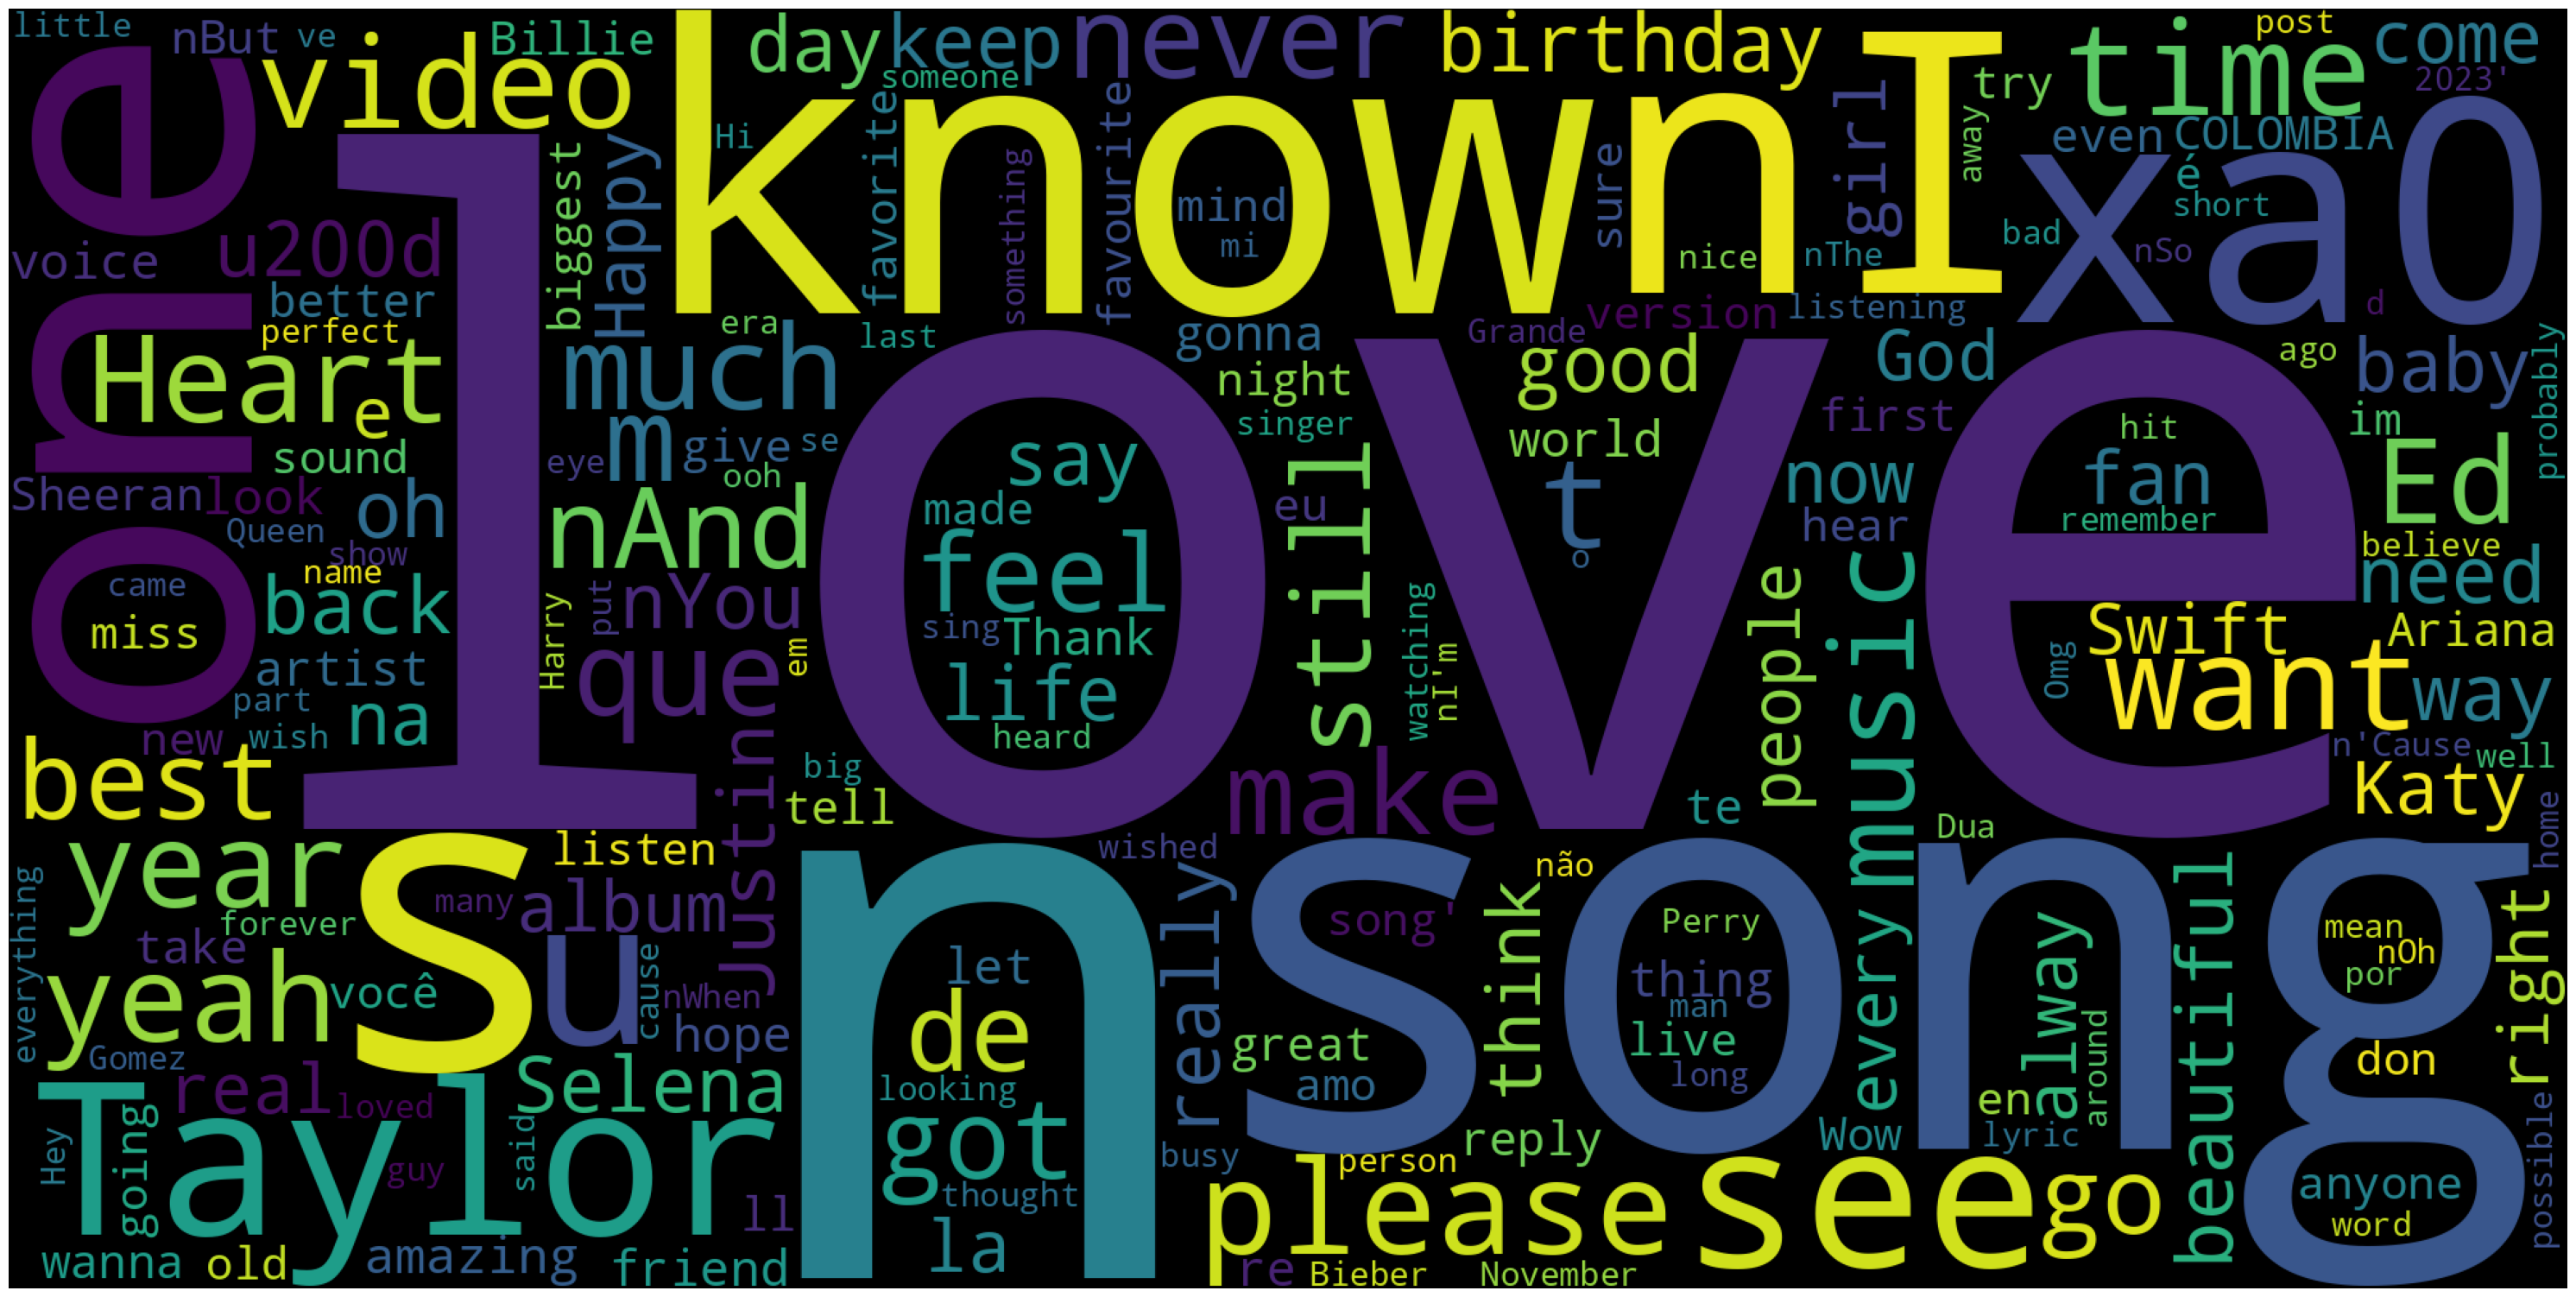

In [174]:
# plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud)
    plt.axis("off");

# make a list of words excluding stopwords
stop_words = set(stopwords.words('english'))
comments_df['comments_no_stopwords'] = comments_df['comments'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in comments_df['comments_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

# plot word cloud
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

# save the plot
plt.tight_layout()
plt.savefig('8.png')